In [1]:
from pandas import read_csv, DataFrame
import pandas as pd

In [2]:
%run 'scripts/dslabs_functions.py'


In [3]:
#get file from bakery_sales pre processing notebook. This file has all the column we need to start the bakery_sales profiling phase
filepath = r'/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/non_supervised_analysis/notebooks/dataset_2/df_bakery_pre_proc.csv'

file_tag = 'Bakery'

bakery_sales = pd.read_csv(filepath)

In [4]:
bakery_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total               2420 non-null   float64
 1   place               2166 non-null   object 
 2   angbutter           2421 non-null   float64
 3   plain bread         2421 non-null   float64
 4   jam                 2421 non-null   float64
 5   americano           2421 non-null   float64
 6   croissant           2421 non-null   float64
 7   caffe latte         2421 non-null   float64
 8   tiramisu croissant  2421 non-null   float64
 9   cacao deep          2421 non-null   float64
 10  pain au chocolat    2421 non-null   float64
 11  almond croissant    2421 non-null   float64
 12  milk tea            2421 non-null   float64
 13  gateau chocolat     2421 non-null   float64
 14  pandoro             2421 non-null   float64
 15  cheese cake         2421 non-null   float64
 16  lemon 

# Dimensionality

In [5]:
from matplotlib.pyplot import figure, savefig, show


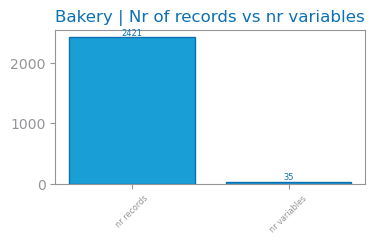

In [6]:
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": bakery_sales.shape[0], "nr variables": bakery_sales.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_records_variables.png") #save for later step
show()

## Missing values


Variables with their respective percentages of missing values:
place: 10.53%
total: 0.04%
Purchase value: 0.04%


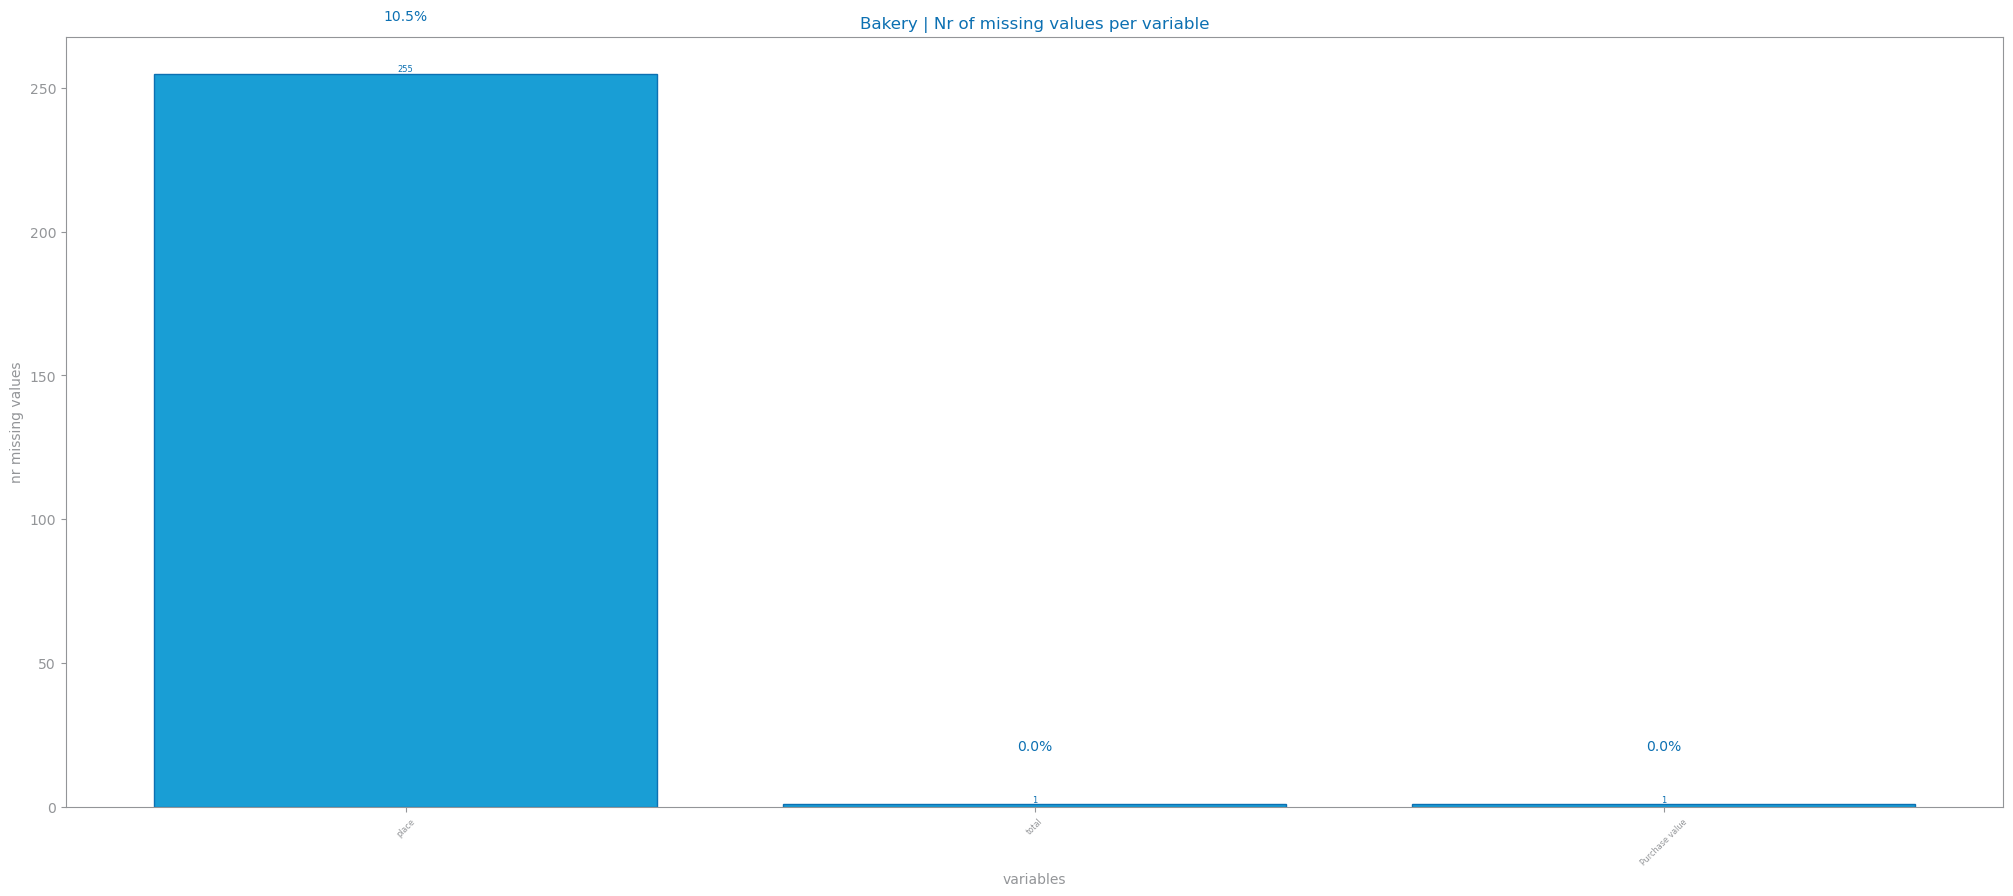

In [7]:
mv: dict[str, int] = {}
total_rows = len(bakery_sales)

# Calculate the number of missing values and percentage for each variable
for var in bakery_sales.columns:
    nr: int = bakery_sales[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} | Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()

## Variables types

In [8]:
bakery_sales.dtypes

total                 float64
place                  object
angbutter             float64
plain bread           float64
jam                   float64
americano             float64
croissant             float64
caffe latte           float64
tiramisu croissant    float64
cacao deep            float64
pain au chocolat      float64
almond croissant      float64
milk tea              float64
gateau chocolat       float64
pandoro               float64
cheese cake           float64
lemon ade             float64
orange pound          float64
wiener                float64
vanila latte          float64
berry ade             float64
tiramisu              float64
merinque cookies      float64
day_of_year           float64
week_of_month         float64
is_weekend               bool
day_of_week_nr        float64
day_of_month          float64
month                 float64
hour                  float64
min                   float64
time_of_day            object
season                 object
Purchase v

In [9]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

{'numeric': ['total', 'angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade', 'merinque cookies', 'day_of_year', 'week_of_month', 'day_of_week_nr', 'day_of_month', 'month', 'hour', 'min', 'product_category'], 'binary': ['tiramisu', 'is_weekend'], 'date': [], 'symbolic': ['place', 'time_of_day', 'season', 'Purchase value']}


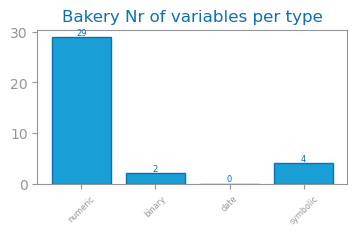

In [10]:
variable_types: dict[str, list] = get_variable_types(bakery_sales)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} Nr of variables per type"
)
savefig(f"./{file_tag}_variable_types.png") 
show()

In [11]:
# Calculate the number of distinct values for each column
distinct_counts = {var_type: {col: bakery_sales[col].nunique() for col in cols} for var_type, cols in variable_types.items()}

# Print the results
for var_type, counts in distinct_counts.items():
    print(f"{var_type.capitalize()} Variables:")
    for col, count in counts.items():
        print(f"  {col}: {count} distinct values")
    print()

Numeric Variables:
  total: 257 distinct values
  angbutter: 12 distinct values
  plain bread: 6 distinct values
  jam: 5 distinct values
  americano: 6 distinct values
  croissant: 8 distinct values
  caffe latte: 4 distinct values
  tiramisu croissant: 10 distinct values
  cacao deep: 5 distinct values
  pain au chocolat: 7 distinct values
  almond croissant: 5 distinct values
  milk tea: 5 distinct values
  gateau chocolat: 3 distinct values
  pandoro: 6 distinct values
  cheese cake: 3 distinct values
  lemon ade: 4 distinct values
  orange pound: 4 distinct values
  wiener: 6 distinct values
  vanila latte: 5 distinct values
  berry ade: 3 distinct values
  merinque cookies: 3 distinct values
  day_of_year: 250 distinct values
  week_of_month: 5 distinct values
  day_of_week_nr: 7 distinct values
  day_of_month: 31 distinct values
  month: 12 distinct values
  hour: 9 distinct values
  min: 60 distinct values
  product_category: 3 distinct values

Binary Variables:
  tiramisu: 2 d

# Distribution


In [12]:
summary5: DataFrame = bakery_sales.describe(include="all")
summary5

total place    angbutter  plain bread          jam  \
count   2.420000e+03  2166  2421.000000  2421.000000  2421.000000   
unique           NaN    19          NaN          NaN          NaN   
top              NaN    동면          NaN          NaN          NaN   
freq             NaN   416          NaN          NaN          NaN   
mean    2.117252e+04   NaN     1.333746     0.424618     0.102850   
std     2.699727e+04   NaN     1.190932     0.649059     0.350555   
min     1.280000e+04   NaN     0.000000     0.000000     0.000000   
25%     1.580000e+04   NaN     1.000000     0.000000     0.000000   
50%     1.850000e+04   NaN     1.000000     0.000000     0.000000   
75%     2.300000e+04   NaN     2.000000     1.000000     0.000000   
max     1.293000e+06   NaN    11.000000     5.000000     5.000000   

          americano    croissant  caffe latte  tiramisu croissant  \
count   2421.000000  2421.000000  2421.000000         2421.000000   
unique          NaN          NaN          NaN                 NaN   
top             NaN          NaN          NaN                 NaN   
freq            NaN          NaN          NaN                 NaN   
mean       0.211896     0.433292     0.088393            0.390335   
std        0.515983     0.863990     0.318236            0.725035   
min        0.000000     0.000000     0.000000            0.000000   
25%        0.000000     0.000000     0.000000            0.000000   
50%        0.000000     0.000000     0.000000            0.000000   
75%        0.000000     1.000000     0.000000            1.000000   
max        5.000000    16.000000     3.000000           14.000000   

         cacao deep  ...  is_weekend  day_of_week_nr  day_of_month  \
count   2421.000000  ...        2421     2421.000000   2421.000000   
unique          NaN  ...           2             NaN           NaN   
top             NaN  ...       False             NaN           NaN   
freq            NaN  ...        1414             NaN           NaN   
mean       0.150351  ...         NaN        3.637753     15.743907   
std        0.409228  ...         NaN        1.981663      8.899652   
min        0.000000  ...         NaN        0.000000      1.000000   
25%        0.000000  ...         NaN        2.000000      8.000000   
50%        0.000000  ...         NaN        4.000000     16.000000   
75%        0.000000  ...         NaN        5.000000     23.000000   
max        4.000000  ...         NaN        6.000000     31.000000   

              month         hour          min  time_of_day  season  \
count   2421.000000  2421.000000  2421.000000         2421    2421   
unique          NaN          NaN          NaN            4       4   
top             NaN          NaN          NaN    Afternoon  Winter   
freq            NaN          NaN          NaN         1686     768   
mean       6.440727    12.719124    26.983478          NaN     NaN   
std        3.784196     1.593246    17.391046          NaN     NaN   
min        1.000000    11.000000     0.000000          NaN     NaN   
25%        3.000000    11.000000    12.000000          NaN     NaN   
50%        7.000000    12.000000    25.000000          NaN     NaN   
75%       10.000000    14.000000    42.000000          NaN     NaN   
max       12.000000    23.000000    59.000000          NaN     NaN   

        Purchase value  product_category  
count             2420       2421.000000  
unique               3               NaN  
top                Low               NaN  
freq               847               NaN  
mean               NaN          1.713755  
std                NaN          0.960938  
min                NaN          0.000000  
25%                NaN          1.000000  
50%                NaN          1.000000  
75%                NaN          3.000000  
max                NaN          3.000000  

[11 rows x 35 columns]

In [13]:
#Use a variable from the bakery_salesset - Note: i dont have numeric variables in my bakery_salesset 
var: str = "total"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for total variable:
	Count:  2420.0
	Mean:  21172.520661157025
	StDev:  26997.269797687644
	Min:  12800.0
	Q1:  15800.0
	Median:  18500.0
	Q3:  23000.0
	Max:  1293000.0


In [14]:
var = "place"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])

Summary for place variable:
	Count:  2166
	Unique:  19
	Top:  동면
	Freq:  416


## Numeric variables


In [15]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
#from dslabs_functions import define_grid, HEIGHT

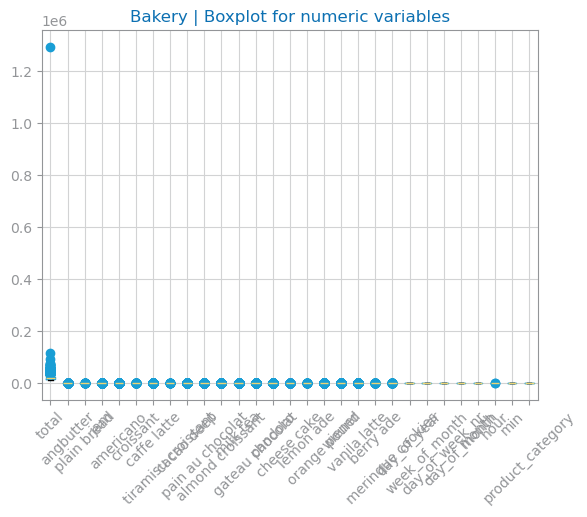

In [16]:
from matplotlib.pyplot import savefig, show, title
#from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(bakery_sales)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    bakery_sales[numeric].boxplot(rot=45)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"./{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

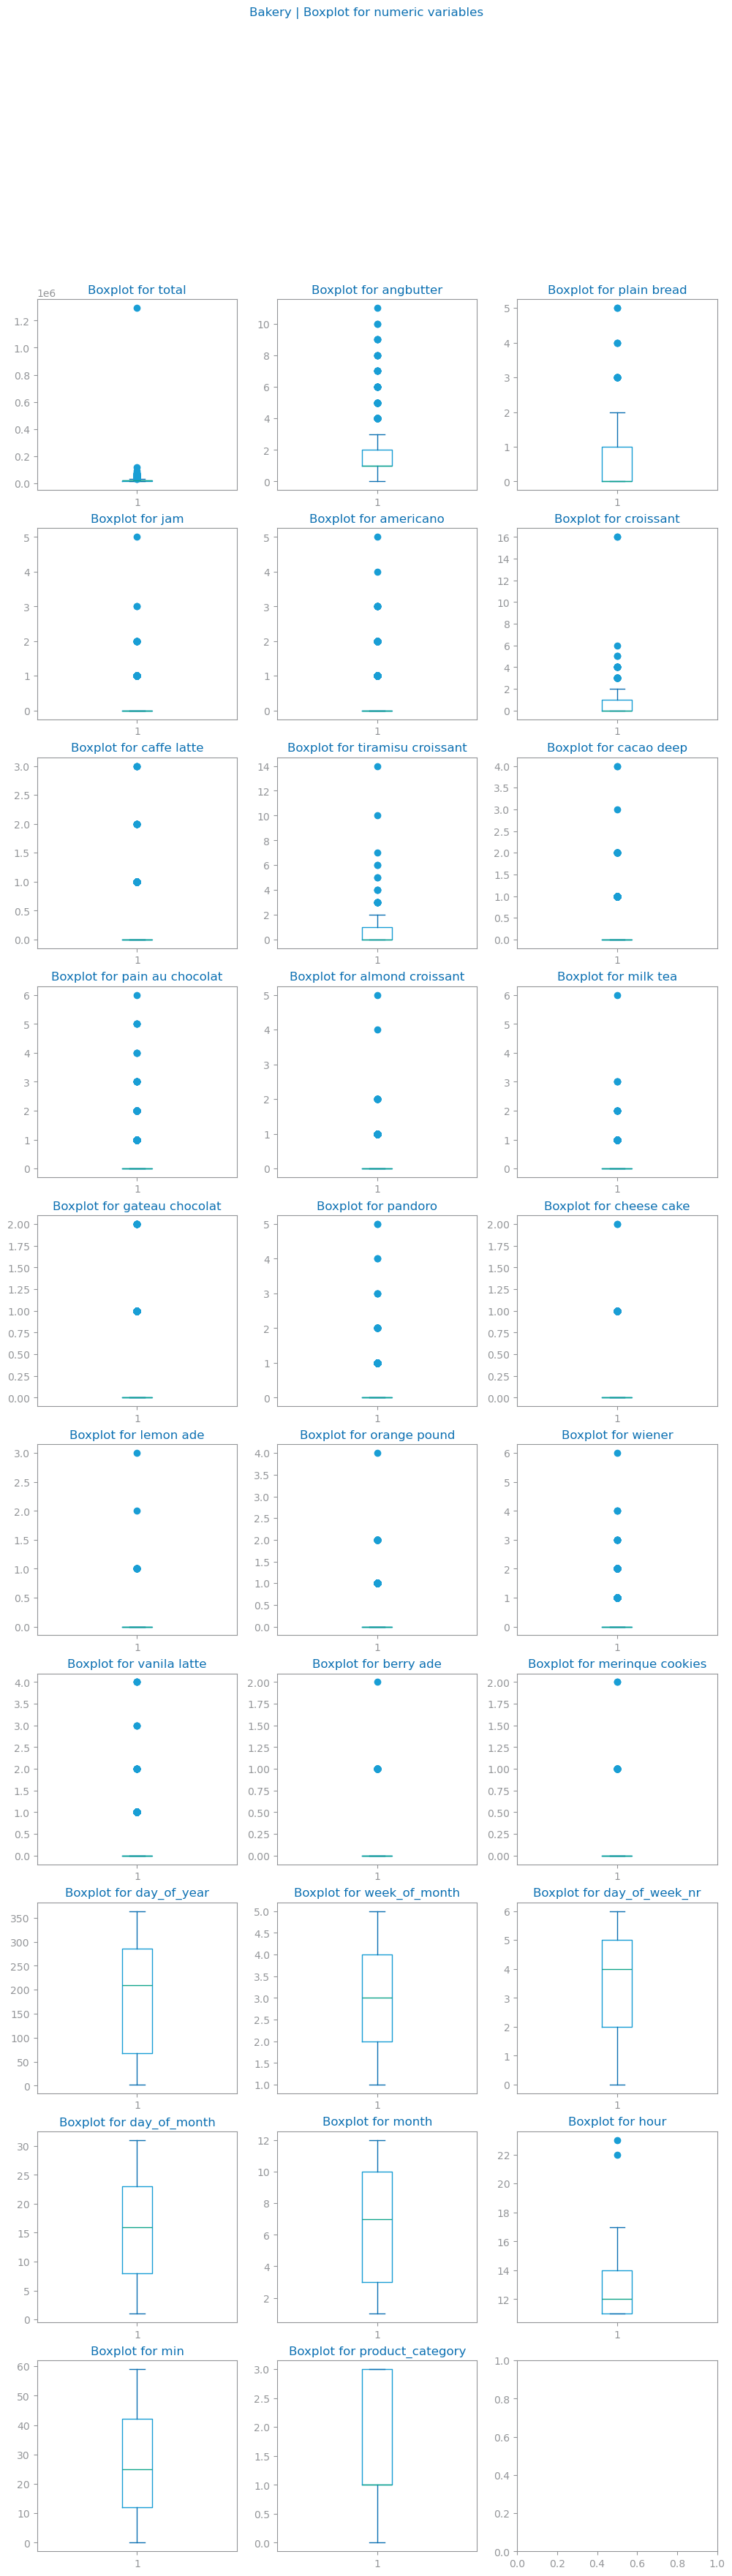

In [17]:
numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(bakery_sales[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

## Outliers
Standard Deviation Method (stdev):

A higher number of outliers detected by this method might suggest that the bakery_sales points are far from the mean, indicating possible anomalies or extreme values
works well on normally distrib bakery_sales

IQR:

less sensitive to skewed bakery_sales and works well with bakery_sales that is not normally distributed because it relies on the spread of the middle 50% of the bakery_sales
A higher number of outliers detected by this method indicates that there are extreme values relative to the majority of bakery_sales points. The IQR method is robust and less influenced by extreme values in the bakery_salesset

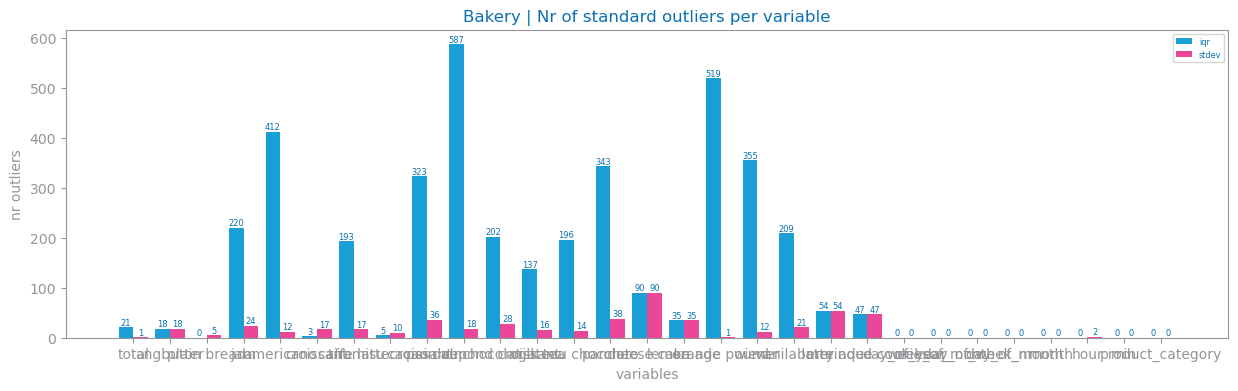

In [18]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib.pyplot import figure, savefig, show
#from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    
    if std_based:
        # Check for NaN or NaT before doing the calculation
        if pd.isna(summary5["mean"]) or pd.isna(summary5["std"]):
            return np.nan, np.nan
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        if pd.isna(summary5["75%"]) or pd.isna(summary5["25%"]):
            return np.nan, np.nan
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    bakery_sales: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    valid_numeric: list = []  # This will store only the variables with valid outlier counts
    summary5: DataFrame = bakery_sales[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        
        # Check if we can compute std-based outliers
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        if not pd.isna(top) and not pd.isna(bottom):
            outliers_stdev_count = (
                bakery_sales[bakery_sales[var] > top].count()[var] + bakery_sales[bakery_sales[var] < bottom].count()[var]
            )
            outliers_stdev.append(outliers_stdev_count)

            # Check if we can compute IQR-based outliers
            top, bottom = determine_outlier_thresholds_for_var(
                summary5[var], std_based=False, threshold=iqrfactor
            )
            if not pd.isna(top) and not pd.isna(bottom):
                outliers_iqr_count = (
                    bakery_sales[bakery_sales[var] > top].count()[var] + bakery_sales[bakery_sales[var] < bottom].count()[var]
                )
                outliers_iqr.append(outliers_iqr_count)
                valid_numeric.append(var)  # Add to valid list if both checks pass

    return {"iqr": outliers_iqr, "stdev": outliers_stdev, "valid_numeric": valid_numeric}


if numeric:
    outliers: dict[str, int] = count_outliers(bakery_sales, numeric, nrstdev=4, iqrfactor=4.5)
    
    # Use only the valid variables for which we have calculated outliers
    valid_numeric = outliers["valid_numeric"]
    
    figure(figsize=(15, HEIGHT))
    plot_multibar_chart(
        valid_numeric,  # Use only valid numeric columns
        {"iqr": outliers["iqr"], "stdev": outliers["stdev"]},  # Use valid outliers
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"./{file_tag}_outliers.png")
    show()
else:
    print("There are no numeric variables.")

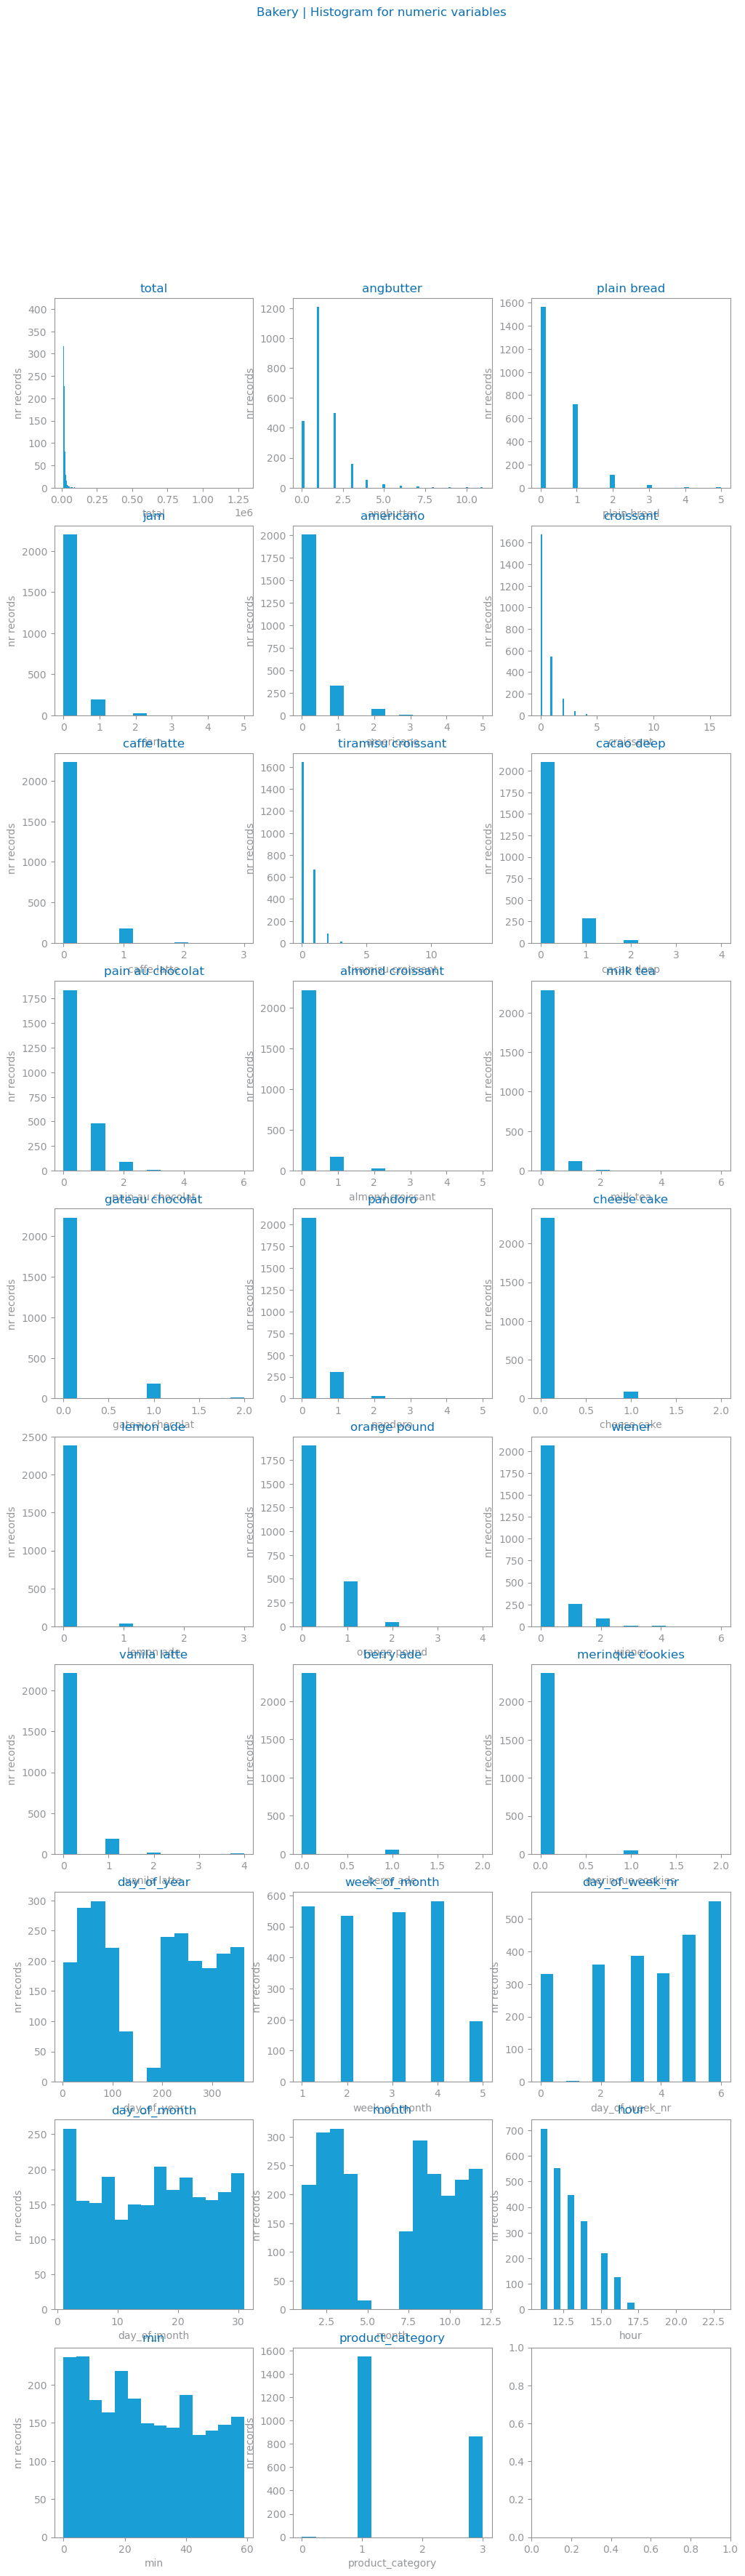

In [19]:
#from dslabs_functions import set_chart_labels


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Histogram for numeric variables')
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"{numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(bakery_sales[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"./{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

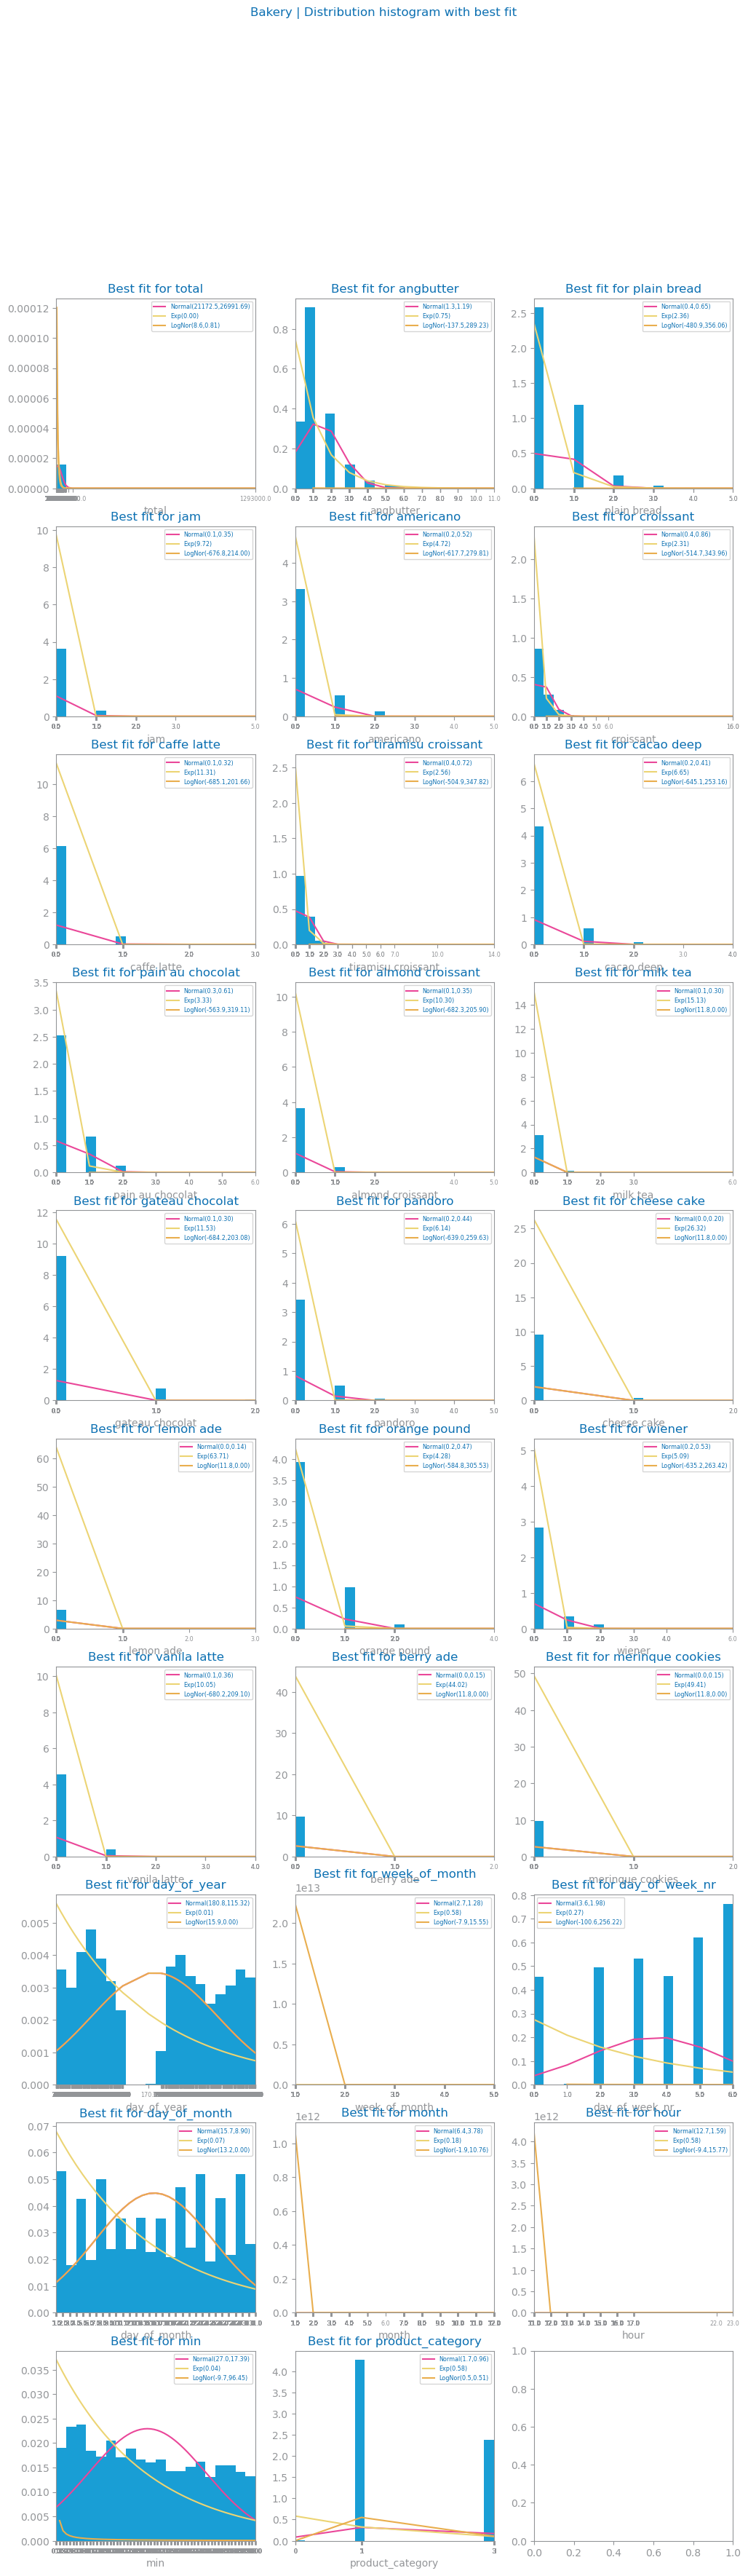

In [20]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No bakery_sales available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], bakery_sales[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

## Symbolic Variables


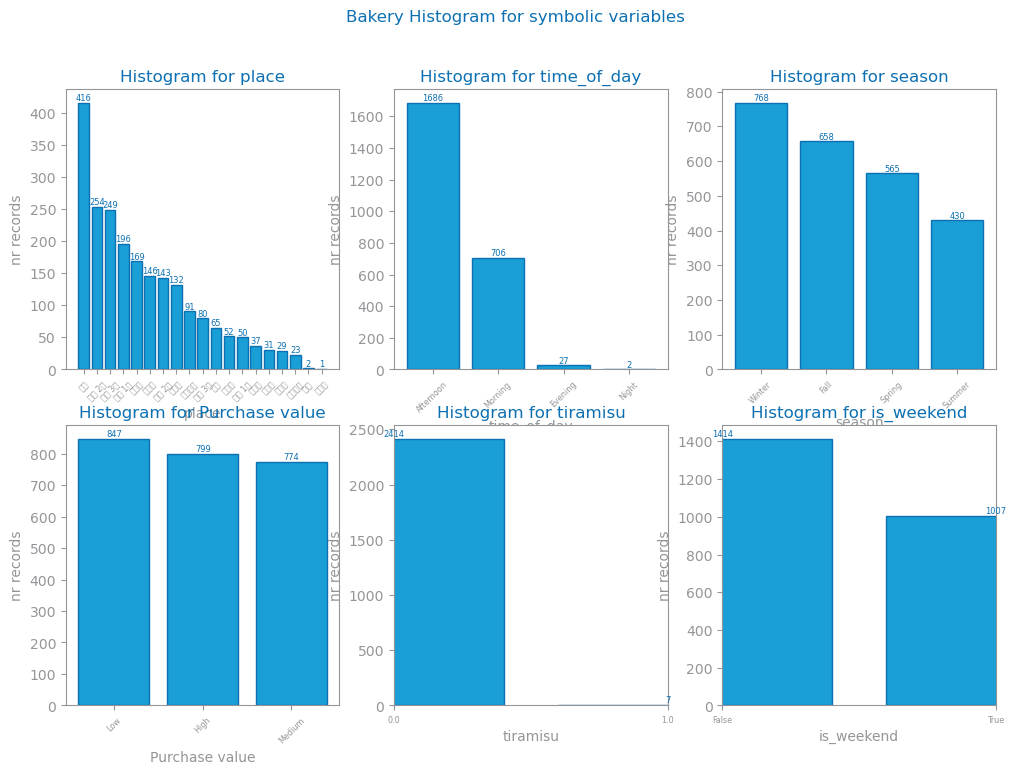

In [21]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
#from dslabs_functions import define_grid, HEIGHT



symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} Histogram for symbolic variables')
    for n in range(len(symbolic)):
        counts: Series = bakery_sales[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title=f"Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

# Granularity

## Dates

In [22]:
from pandas import DataFrame
#ver para weekend, dia da semana (mon, tue, thu), hora, minuto. estudar a granularidade destas variaveis.
#variáveis ciclicas.

def derive_date_variables(bakery_sales: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        bakery_sales[date + "_year"] = bakery_sales[date].dt.year
        bakery_sales[date + "_quarter"] = bakery_sales[date].dt.quarter
        bakery_sales[date + "_month"] = bakery_sales[date].dt.month
        bakery_sales[date + "_day"] = bakery_sales[date].dt.day
    return bakery_sales

In [23]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

In [24]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(bakery_sales: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = bakery_sales[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


bakery_sales: DataFrame = read_csv(
    filepath, index_col=None, parse_dates=True, dayfirst=True
)
variables_types: dict[str, list] = get_variable_types(bakery_sales)
bakery_sales_ext: DataFrame = derive_date_variables(bakery_sales, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(bakery_sales, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")
    show()

# Sparsity
Note: scatter function is not able to deal with MV in non-numeric variables, and so we need to drop any of records having them (using the dropna method)

In [25]:
# Drop rows with NaN values
sampled_bakery_sales = bakery_sales.dropna(axis=1) #correr com axis=0 p retirar os records e nao as variaveis

# Check if bakery_sales is empty after dropping NaNs
if sampled_bakery_sales.empty:
    print("No bakery_sales available after dropping NaN values.")
else:
    vars: list = sampled_bakery_sales.columns.to_list()  # Ensure you're using bakery_sales's columns

    if vars:  # Check if vars is not empty
        n: int = len(vars) - 1
        fig: Figure
        axs: ndarray
        fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)

        fig.suptitle(f'{file_tag} | Sparsity Study')


        for i in range(len(vars)):
            var1: str = vars[i]
            for j in range(i + 1, len(vars)):
                var2: str = vars[j]
                plot_multi_scatters_chart(sampled_bakery_sales, var1, var2, ax=axs[i, j - 1])
        
        # Save the figure if needed
        savefig(f"./{file_tag}_sparsity_study.png")
        show()
    else:
        print("Sparsity class: there are no variables.")